/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(99, 546)
Using Logistic Regression, Accuracy: 0.9
File: tentest_classes/beach05.tif   Actual:  beach   Predicted:  beach
Confusion matrix
[[2 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 1 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 2 0 2]]

Using Gaussian Naive Bayes, Accuracy: 0.8666666666666667
File: tentest_classes/beach05.tif   Actual:  beach   Predicted:  beach


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

Confusion matrix
[[2 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 1 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 2 0 2]]

Using Information Gain Decision tree, Accuracy: 0.6333333333333333
File: tentest_classes/chaparral04.tif   Actual:  chaparral   Predicted:  chaparral
Confusion matrix
[[0 0 1 0 0 0 1 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 1]
 [0 0 0 2 0 0 1 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 1 0 0 2 0 0]
 [0 0 0 0 0 0 2 0 1 0]
 [0 0 1 1 0 0 2 0 0 0]]

Using CART Decision tree, Accuracy: 0.7333333333333333
File: tentest_classes/overpass07.tif   Actual:  overpass   Predicted:  overpass
Confusion matrix
[[2 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 1 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 2 0 0 1 0 0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


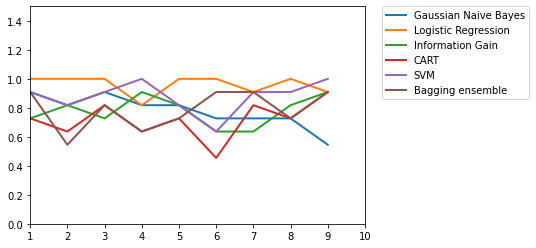

In [5]:

import os
import numpy as np
from PIL import Image
import math
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import cv2
from sklearn.ensemble import BaggingClassifier

dir = 'tentest_classes'

def docrossv(model,feat,classv,lstr):
    k_fold = KFold(n_splits=9, shuffle=True)
    cou = 1
    xa = []
    ya = []
    for (train_index, test_index) in k_fold.split(feat):
        model.fit(feat[train_index],classv[train_index])
        acc = model.score(feat[test_index],classv[test_index])
        xa.append(cou)
        ya.append(acc)
        cou = cou + 1
    plt.plot(xa,ya,linewidth=2.0,label=lstr)


def predictv(model,file):
    feat = cf(file)
    clav = clv(file)
    par = []
    par.append(feat)
    predc=model.predict(par)
    print('File:', file, '  Actual: ', clav, '  Predicted: ', predc[0])
    
def printcm(model,testD,testL):
    predL = model.predict(testD)
    print('Confusion matrix')
    print(confusion_matrix(testL,predL))
    
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

def fd_histogram(image, bins=8):
  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
   
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])

    return hist.flatten()
    
imagf = []

for root, dirs, files in os.walk(dir):
    for file in files:
        imagf.append(os.path.join(dir,file))

imagf = np.array(imagf)        

def cf(file):

    im = Image.open(file)
    pixels = np.array(im)

    im_h, im_w = im.size
    n=3
    x = math.floor(im_h/n)
    y = math.floor(im_w/n)
    

    val = []

    for i in range(0,n):
        for j in range(0,n):
            if i == n-1 and j == n-1:
                arr = np.array(pixels[i*x:,j*y:,:])
            elif i==n-1:
                arr = np.array(pixels[i*x:,j*y:j*y+y,:])
            elif j==n-1:
                arr = np.array(pixels[i*x:i*x+x,j*y:,:])
            else:
                arr = np.array(pixels[i*x:i*x+x,j*y:j*y+y,:])
            val.append(arr)

    
    val = np.array(val)


    avim = []  

    
    for u in range(0,n*n):
        y0 = []
        y1 = []
        y2 = []
        den = 0
        for v in val[u]:
            y0.append(np.sum(v[:,0]))
            y1.append(np.sum(v[:,1]))
            y2.append(np.sum(v[:,2]))
            den = den + len(v)
        s1 = np.sum(np.array(y0))
        s2 = np.sum(np.array(y1))
        s3 = np.sum(np.array(y2))
        
        avim.append(s1/den)
        avim.append(s2/den)
        avim.append(s3/den)

    

    avim = np.floor(np.array(avim))
    
    return np.hstack([fd_hu_moments(pixels),fd_histogram(pixels),avim])

def clv(file):
    strg = file[file.find('/'):]
    stf = ''.join(re.findall('[a-zA-Z]',strg[0:strg.find('.')]))
    return stf    

arrs = [cf(file) for file in imagf]
arrs = np.array(arrs)
print(arrs.shape)

clvs= [clv(file) for file in imagf]
clvs = np.array(clvs)

trainData,testData,trainLabels,testLabels=train_test_split(arrs,clvs,test_size=0.3)
lr=LogisticRegression()
lr.fit(trainData,trainLabels)
print('Using Logistic Regression, Accuracy:', lr.score(testData,testLabels))
predictv(lr,dir + '/beach05.tif')
printcm(lr,testData,testLabels)


nb=GaussianNB()
nb.fit(trainData,trainLabels)


print('')
print('Using Gaussian Naive Bayes, Accuracy:', nb.score(testData,testLabels))
predictv(nb,dir + '/beach05.tif')
printcm(nb,testData,testLabels)

dct = DecisionTreeClassifier(criterion='entropy')
dct.fit(trainData,trainLabels)
print('')
print('Using Information Gain Decision tree, Accuracy:', dct.score(testData,testLabels))
predictv(dct,dir + '/chaparral04.tif')
printcm(dct,testData,testLabels)
 
dct2 = DecisionTreeClassifier(criterion='gini')
dct2.fit(trainData,trainLabels)
print('')
print('Using CART Decision tree, Accuracy:', dct2.score(testData,testLabels))
predictv(dct2,dir + '/overpass07.tif')
printcm(dct2,testData,testLabels)

sv1 = SVC()
sv1.fit(trainData,trainLabels)
print('')
print('Using SVM classifier, Accuracy:', sv1.score(testData,testLabels))
predictv(sv1,dir + '/airplane09.tif')
printcm(sv1,testData,testLabels)

bagging = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_depth = 8),max_samples=0.5, max_features=0.5)
bagging.fit(trainData,trainLabels)
print('')
print('Using Bagging Ensemble in CART, Accuracy:', bagging.score(testData,testLabels))
predictv(bagging,dir + '/storagetanks00.tif')
printcm(bagging,testData,testLabels)



nb2 = GaussianNB()
docrossv(nb2,arrs,clvs,'Gaussian Naive Bayes')
lr2 = LogisticRegression()
docrossv(lr2,arrs,clvs,'Logistic Regression')
dce2 = DecisionTreeClassifier(criterion='entropy')
docrossv(dce2,arrs,clvs,'Information Gain')
dcg2 = DecisionTreeClassifier(criterion='gini')
docrossv(dcg2,arrs,clvs,'CART')
sv2 = SVC()
docrossv(sv2,arrs,clvs,'SVM')
bag2 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_depth = 8),max_samples=0.5, max_features=0.5)
docrossv(bag2,arrs,clvs,'Bagging ensemble')
axes = plt.gca()
axes.set_xlim([1,10])
axes.set_ylim([0,1.5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()